# NYC Bridge Crossings - Poisson regression model

Poisson regression model for regressing the bicyclist counts observed on the Brooklyn bridge between 01 April 2017 and 31 October 2017.

Source: https://timeseriesreasoning.com/contents/poisson-regression-model/

The project starts with the Poisson regression model and use it as the “control” for the Negative Binomial regression model in part 2 of this project but built in a second notebook. Cameron and Trivedi recommend best practice is to estimate both Poisson and Negative Binomial regression models (Cameron and Trivedi, 2013).


## Project Objective
The purpose of this project is to predict daily counts of bicyclists on the Brooklyn bridge 

## Importing the Python Packages

import the required Python packages.

In [298]:
import pandas as pd # used to "tidy" up and manipulate our data
import numpy as np # used for matrix and numerical calculations; foundation of pandas
import matplotlib.pyplot as plt # used for visualisations
%matplotlib inline
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR') # error handling
import seaborn as sns # a more user-friendly library used for visualisations
sns.set_theme(rc={'figure.figsize':(8,6)})
import statistics
from patsy import dmatrices
import statsmodels.api as sm
from scipy.stats import pearsonr # import pearsonr function to calculate  Pearson correlation coefficient


## 1. Collect the Data

Import the data into a dataframe called `df`.

In [299]:
dfr = pd.read_excel("C:/Users/ke337467/OneDrive - Oxfordshire County Council/Data Scientist Apprenticeship/Module Portfolio - Data Science Professional Practice/New York City - East River Bicycle Crossings/Bikes.xlsx")

To verify that the import worked as expected, preview the data using the `head()` method.

In [300]:
dfr.head()

,Date,HIGH_T,LOW_T,PRECIP,BB_COUNT
0,2017-04-01,46.0,37.0,0.00,606
1,2017-04-02,62.1,41.0,0.00,2021
2,2017-04-03,63.0,50.0,0.03,2470
3,2017-04-04,51.1,46.0,1.18,723
4,2017-04-05,63.0,46.0,0.00,2807


## 2. Tidy up the data set
Check the data set for any missing data

In [301]:
dfr.isnull().sum(axis=0)

Date        0
HIGH_T      0
LOW_T       0
PRECIP      0
BB_COUNT    0
dtype: int64

The dataset does not have any missing values.  
  
From `date` extract the following derived variables:  
* Month
* Day_of_week
* Day  
Convert Date to datetime format by using `infer_datetime_format=True` 

In [302]:
dfr['Date'] = pd.to_datetime(dfr['Date'],infer_datetime_format=True)

Extract the derived variables

In [303]:
dfr['Month'] = dfr['Date'].dt.month
dfr['Day'] = dfr['Date'].dt.day
dfr['Day_of_Week'] = dfr['Date'].dt.dayofweek

`Date` is no longer needed so drop it from the data frame using the `.drop()` method.

In [304]:
df = dfr.drop('Date', axis=1)

In [305]:
df.head()

,HIGH_T,LOW_T,PRECIP,BB_COUNT,Month,Day,Day_of_Week
0,46.0,37.0,0.00,606,4,1,5
1,62.1,41.0,0.00,2021,4,2,6
2,63.0,50.0,0.03,2470,4,3,0
3,51.1,46.0,1.18,723,4,4,1
4,63.0,46.0,0.00,2807,4,5,2


The dataset has seven columns. Six - `HIGH_T`,  `LOW_T`, `PRECIP`,  `Month`, `Day` and `Day_of_Week` - are the predictors (or independent variables), while - `BB_COUNT` - is the response (or dependent variable).

## 2. Explore the Data
A concise summary data tructure by calling the info() method.

In [306]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   HIGH_T       214 non-null    float64
 1   LOW_T        214 non-null    float64
 2   PRECIP       214 non-null    float64
 3   BB_COUNT     214 non-null    int64  
 4   Month        214 non-null    int64  
 5   Day          214 non-null    int64  
 6   Day_of_Week  214 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 11.8 KB


There are 214 instances (or rows) in the dataset.

The dataset consists of 7 features (or columns). 

Summary statistics for the numeric features in the data by calling the describe() method.

In [307]:
df.describe()

,HIGH_T,LOW_T,PRECIP,BB_COUNT,Month,Day,Day_of_Week
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,74.201869,62.027103,0.132430,2680.042056,7.009346,15.789720,3.000000
std,10.390443,9.305792,0.394004,854.710864,2.002324,8.848102,2.016365
min,46.000000,37.000000,0.000000,151.000000,4.000000,1.000000,0.000000
25%,66.900000,55.225000,0.000000,2298.000000,5.000000,8.000000,1.000000
50%,75.900000,64.000000,0.000000,2857.000000,7.000000,16.000000,3.000000
75%,82.000000,70.000000,0.037500,3285.000000,9.000000,23.000000,5.000000
max,93.900000,78.100000,3.030000,4960.000000,10.000000,31.000000,6.000000


<span style="color:red">**Note :**</span>  there are no discernible outliers within the dataset

### 2.2 Verifying the correlation between the predictors and response variables

#### 2.2.1 Correlation between High Temperature and bike crossings.


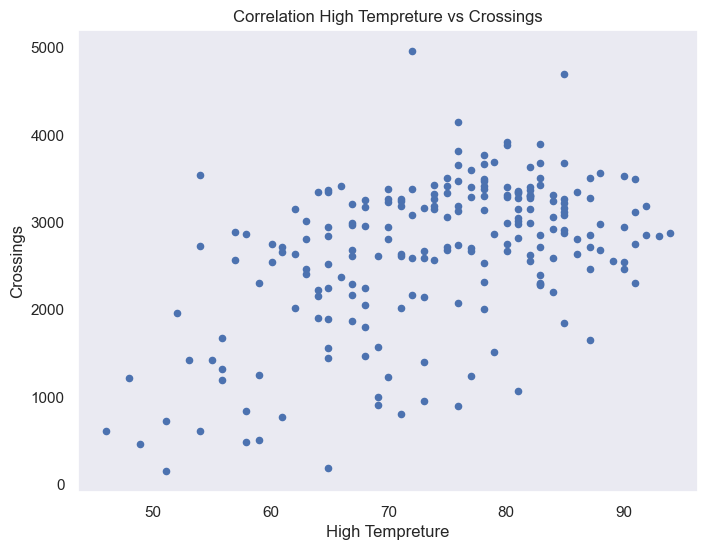

In [308]:
%matplotlib inline
df.plot(kind = 'scatter', x = 'HIGH_T', y = 'BB_COUNT')
plt.title('Correlation High Tempreture vs Crossings')
plt.xlabel('High Tempreture')
plt.ylabel('Crossings')
plt.grid(False)

#### 2.2.1. Results:

In [309]:
htc = pearsonr(df['HIGH_T'], df['BB_COUNT'])
htc

PearsonRResult(statistic=0.49404146917932307, pvalue=1.4356376824759527e-14)

#### 2.2.1. Observations:
Pearson correlation coefficient (r) = `0.4940`indicates a <span style="color:green">**moderate positive correlation**</span> between the high temperature `[HIGH_T]`and bicycle crossings `[BB_COUNT]`
 
Two-tailed p-value (p) = `1.4356`being greater than the level of significance ` p > 0.05` indicates that there is <span style="color:red">**not a statistically significant association**</span>  between high temperature `[HIGH_T]`and bicycle crossings `[BB_COUNT]`


#### 2.2.2 Correlation between Low Temperature and bike crossings.

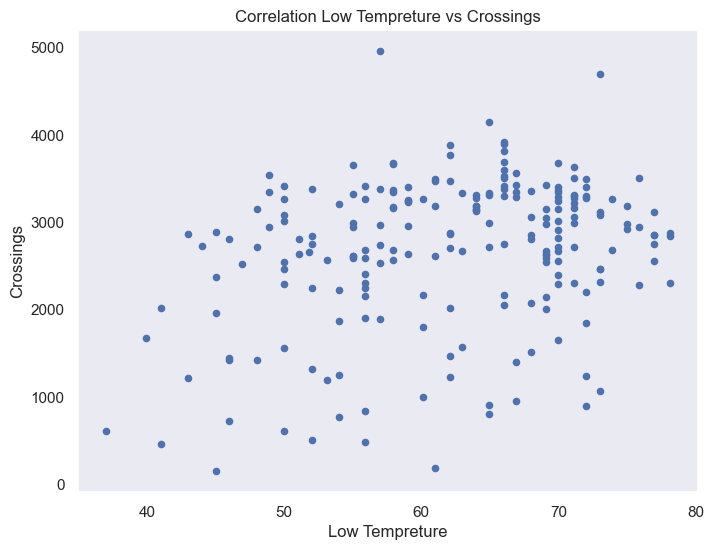

In [310]:
%matplotlib inline
df.plot(kind = 'scatter', x = 'LOW_T', y = 'BB_COUNT')
plt.title('Correlation Low Tempreture vs Crossings')
plt.xlabel('Low Tempreture')
plt.ylabel('Crossings')
plt.grid(False)

#### 2.2.2. Results:

In [311]:
ltc = pearsonr(df['LOW_T'], df['BB_COUNT'])
ltc

PearsonRResult(statistic=0.2942272625472554, pvalue=1.2075292130639781e-05)

#### 2.2.2. Observations:
Pearson correlation coefficient (r) = `0.2942`indicates a <span style="color:red">**weak positive correlation**</span> between the low temperature `[LOW_T]`and bicycle crossings `[BB_COUNT]`
 
Two-tailed p-value (p) = `1.2075`being greater than the level of significance ` p > 0.05` indicates that there is <span style="color:red">**not a statistically significant association**</span>  between low temperature `[LOW_T]`and bicycle crossings `[BB_COUNT]`

#### 2.2.3 Correlation between Low Temperature and bike crossings.

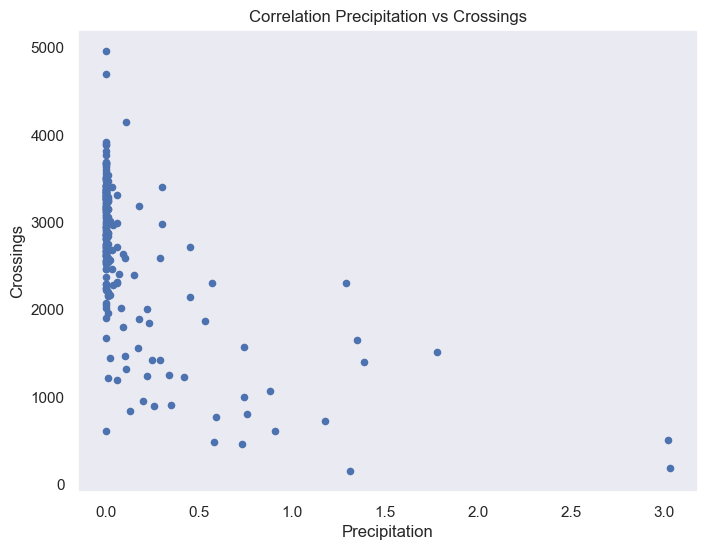

In [312]:
%matplotlib inline
df.plot(kind = 'scatter', x = 'PRECIP', y = 'BB_COUNT')
plt.title('Correlation Precipitation vs Crossings')
plt.xlabel('Precipitation')
plt.ylabel('Crossings')
plt.grid(False)

#### 2.2.3. Results:

In [313]:
pbc = pearsonr(df['PRECIP'], df['BB_COUNT'])
pbc

PearsonRResult(statistic=-0.5796125067528879, pvalue=1.331790088659778e-20)

#### 2.2.3. Observations:
Pearson correlation coefficient (r) = `- 0.5796`indicates a <span style="color:green">**moderate negative correlation**</span> between precipitation `[PRECIP]`and bicycle crossings `[BB_COUNT]`
 
Two-tailed p-value (p) = `1.3318`being greater than the level of significance ` p > 0.05` indicates that there is <span style="color:red">**not a statistically significant association**</span>  between precipitation `[PRECIP]`and bicycle crossings `[BB_COUNT]`

## 3. Prepare the Data for the data model

#### 3.1. Create the training and testing data sets.

In [314]:
mask = np.random.rand(len(df)) < 0.8
df_train = df[mask]
df_test = df[~mask]
print('Training data set length='+str(len(df_train)))
print('Testing data set length='+str(len(df_test)))

Training data set length=163
Testing data set length=51


#### 3.2. Setup the regression expression
This expression is telling patsy that `BB_COUNT` is the response variable and the predictor variables are `DAY`, `DAY_OF_WEEK`, `MONTH`, `HIGH_T`, ` LOW_T` and `PRECIP`

In [315]:
expr = """BB_COUNT ~ Day  + Day_of_Week + Month + HIGH_T + LOW_T + PRECIP"""

#### 3.3. Create the train and test data sets
Set up the x and y matrices for the training and testing data sets. Patsy makes this really simple

In [316]:
y_train, x_train = dmatrices(expr, df_train, return_type='dataframe')
y_test, x_test = dmatrices(expr, df_test, return_type='dataframe')

### 4.1. Training the Poisson Regression Model

Use the `statsmodels GLM class` class from the `statsmodels` package to train the model.

In [317]:
poisson_training_results = sm.GLM(y_train, x_train, family=sm.families.Poisson()).fit()

### 4.2. Reviewing the training summary
Print the training summary

In [318]:
print(poisson_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               BB_COUNT   No. Observations:                  163
Model:                            GLM   Df Residuals:                      156
Model Family:                 Poisson   Df Model:                            6
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11426.
Date:                Wed, 15 Jan 2025   Deviance:                       21277.
Time:                        10:18:08   Pearson chi2:                 2.08e+04
No. Iterations:                     6   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       7.1666      0.012    574.329      

### 4.3. Predictions on the test data set

In [319]:
poisson_predictions = poisson_training_results.get_prediction(x_test)
#summary_frame() returns a pandas DataFrame
predictions_summary_frame = poisson_predictions.summary_frame()
predictions_summary_frame.head()

,mean,mean_se,mean_ci_lower,mean_ci_upper
5,1243.787222,8.085964,1228.039564,1259.736818
8,2768.605564,14.700030,2739.943430,2797.567527
13,2671.626934,9.798854,2652.490398,2690.901530
14,2495.088053,9.093418,2477.328786,2512.974632
15,3320.790004,16.927692,3287.777525,3354.133961


### 4.4. Prediccted vs Actual bike counts across Brooklyn Bridge
Plot the the predicted counts versus the actual counts for the test data

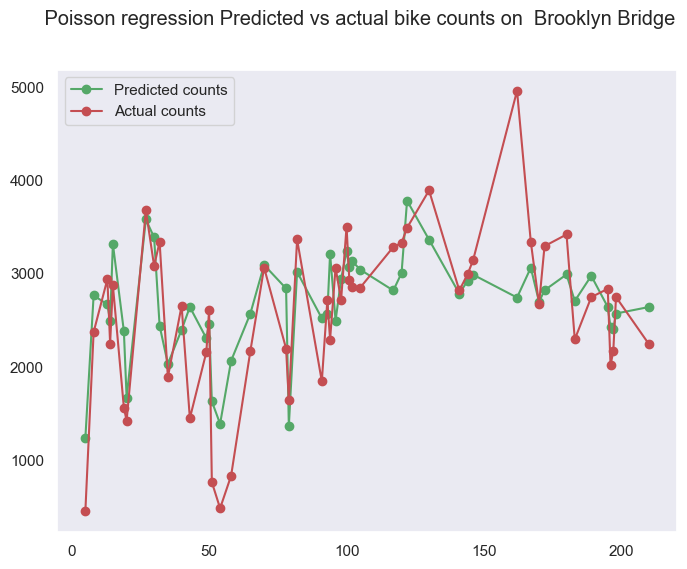

In [320]:
predicted_counts=predictions_summary_frame['mean']
actual_counts = y_test['BB_COUNT']
fig = plt.figure()
fig.suptitle(' Poisson regression Predicted vs actual bike counts on  Brooklyn Bridge')
predicted, = plt.plot(x_test.index, predicted_counts, 'go-', label='Predicted counts')
actual, = plt.plot(x_test.index, actual_counts, 'ro-', label='Actual counts')
plt.legend(handles=[predicted, actual])
plt.grid(False)
plt.show()

### 5. Conclusion

The model appears to be tracking the trend in the actual counts. 
<span style="color:red">However</span> a significant number of the <span style="color:red">**predictions are inaccurate**</span> when compared to the actual value.




In [321]:
print(poisson_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               BB_COUNT   No. Observations:                  163
Model:                            GLM   Df Residuals:                      156
Model Family:                 Poisson   Df Model:                            6
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11426.
Date:                Wed, 15 Jan 2025   Deviance:                       21277.
Time:                        10:18:08   Pearson chi2:                 2.08e+04
No. Iterations:                     6   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       7.1666      0.012    574.329      

<span style="color:red">**Note:**</span> *“A common source of failure of the Poisson regression model is that the data does not satisfy the mean = variance criterion imposed by the Poisson distribution”*.   (Source:https://timeseriesreasoning.com/contents/poisson-regression-model/ )

#### 5.1 Interpretation of this model’s statistics 
* Deviance: 	24266.0
* Pearson chi2:	2.43  
The above to values are very large and a good it unlikely (despite the reasonable plot).  

* DF Residuals 	= No. Observations minus DF model
                = 179 – 6 = 173	

At p=0.05 and DF Residuals = 173, the chi-squared value (chi2) from a standard Chi-Squared table is 224.660 (Source:https://www.medcalc.org/manual/chi-square-table.php ). This value is much smaller than this model’s reported Deviance = 24266 and Pearson chi2 = 24300. Therefore despite a reasonable visual fit or the test data the it is statistically poor. (Source:https://timeseriesreasoning.com/contents/poisson-regression-model/)


# The Negative Binomial Regression Model

The Poisson regression model developed above has been inadequate for modelling the  NYC Bridge bike crossings. Visually the lot looked *okay* but the results were statistically poor.

The poor performance is because the data does not adhere to the *variance = mean* criterion required the Poisson regression.

Source for the **Negative Binomial Regression Model** (https://timeseriesreasoning.com/contents/negative-binomial-regression-model/).  

The **Negative Binomial (NB)** regression model does not require the *variance = mean* assumption to be met in  the data.

<span style="color:red">**Note:**</span> There are two Negative Binomial regression models namely **NB1** and **NB2**.   
Negative Binomial regression model does not make the *variance = mean assumption* instead defines a new parameter α :

**NB1** takes the following form:  
When **p = 1:**  
>*Variance = mean + ∝ × mean*  
>*= (1 + ∝) × mean*  

**NB2** takes the following form:  
When **p = 2:**   
>*Variance = mean + ∝ × $mean^2$*   

The model below uses **NB2**. The Python *statsmodels* library also supports the NB2 model. The *statsmodels.genmod.families.family package* has a class devoted to the NB2 model.

>*class statsmodels.genmod.families.family.NegativeBinomial(link=None, alpha=1.0)*

NB2 regression strategy (recommend in https://timeseriesreasoning.com/contents/negative-binomial-regression-model/)
* Stage 1: Fit the Poisson regression model on the data set. This step provides the vector of fitted rates `λ`.
* Stage 2: Fit the *aux OLS regression model* on the data set. This provides the value of `α`.
* Stage 3: Use the `α` from Stage 2 to fit the **NB2** regression model to the data set.
* Stage 4: Use the fitted NB2 model to make predictions about expected counts on the test data set.
* Stage 5: Test the goodness-of-fit of the **NB2** model.

## Stage 1: configure and fit the Poisson regression model on the training data set


In [322]:
y1_train, x1_train = dmatrices(expr, df_train, return_type='dataframe')
y1_test, x1_test = dmatrices(expr, df_test, return_type='dataframe')

In [323]:
poisson_training_results = sm.GLM(y1_train, x1_train, family=sm.families.Poisson()).fit()

In [324]:
print(poisson_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               BB_COUNT   No. Observations:                  163
Model:                            GLM   Df Residuals:                      156
Model Family:                 Poisson   Df Model:                            6
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11426.
Date:                Wed, 15 Jan 2025   Deviance:                       21277.
Time:                        10:18:09   Pearson chi2:                 2.08e+04
No. Iterations:                     6   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       7.1666      0.012    574.329      

In [325]:
#print(poisson_training_results.mu)
print(len(poisson_training_results.mu))

163


## Stage 2: auxiliary OLS regression model
Fit the auxiliary OLS regression model on the data set and use the fitted model to get the value of α.

In [326]:
import statsmodels.formula.api as smf

Add the `λ` vector as a new column called *BB_LAMBDA*  to the Data Frame of the training data set. 

 `λ`’s dimensions are (n x 1). In this dataset it will be (171 x 1).
The `λ ` vector is available in *poisson_training_results.mu*


In [327]:
df_train

,HIGH_T,LOW_T,PRECIP,BB_COUNT,Month,Day,Day_of_Week
0,46.0,37.0,0.00,606,4,1,5
1,62.1,41.0,0.00,2021,4,2,6
2,63.0,50.0,0.03,2470,4,3,0
3,51.1,46.0,1.18,723,4,4,1
4,63.0,46.0,0.00,2807,4,5,2
...,...,...,...,...,...,...,...
208,57.0,53.1,0.00,2565,10,26,3
209,62.1,48.0,0.00,3150,10,27,4
211,64.9,61.0,3.03,183,10,29,6
212,55.0,46.0,0.25,1428,10,30,0


#### Add the λ vector to df_train as 'BB_LAMBDA'
First add the λ vector as a new column called ‘BB_LAMBDA’ to df_train (training data set). Note: λ’s dimensions are (n x 1) where n= number of instances in the training data set.

In [328]:
df_train['BB_LAMBDA'] = poisson_training_results.mu

<ipython-input-328-8d40ae58569c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['BB_LAMBDA'] = poisson_training_results.mu


Next add a derived column called `AUX_OLS_DEP` to df_train. This new column will store the values of the dependent variable of the OLS regression.

Formula for the dependent variable of the OLS regression:

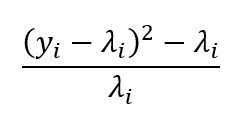


In [329]:
df_train['AUX_OLS_DEP'] = df_train.apply(lambda x: ((x['BB_COUNT'] - x['BB_LAMBDA'])**2 - x['BB_LAMBDA']) / x['BB_LAMBDA'], axis=1)

<ipython-input-329-69a624a08222>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['AUX_OLS_DEP'] = df_train.apply(lambda x: ((x['BB_COUNT'] - x['BB_LAMBDA'])**2 - x['BB_LAMBDA']) / x['BB_LAMBDA'], axis=1)


In [330]:
ols_expr = """AUX_OLS_DEP ~ BB_LAMBDA - 1"""

In [331]:
aux_olsr_results = smf.ols(ols_expr, df_train).fit()

In [332]:
print(aux_olsr_results.params)

BB_LAMBDA    0.036606
dtype: float64


## Stage 2: Is α statistically significant?

Is this value of α (0.0389) statistically significant? Or can it be zero for all practical purposes?  

It is important to test this because if α is zero, then the equation below:


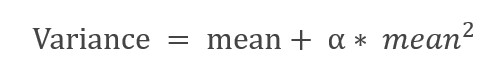


reduces to *Variance = mean* This is the variance function of the Poisson regression model.  

**Note:** If the value of α is statistically not significant, then the Negative Binomial regression model cannot do a better job of fitting the training data set than a Poisson regression model.

The *OLSResults* object contains the t-score of the regression coefficient α.


In [333]:
aux_olsr_results.tvalues

BB_LAMBDA    5.404745
dtype: float64

Using a t-value calculator (useful one here: https://goodcalculators.com/student-t-value-calculator/)

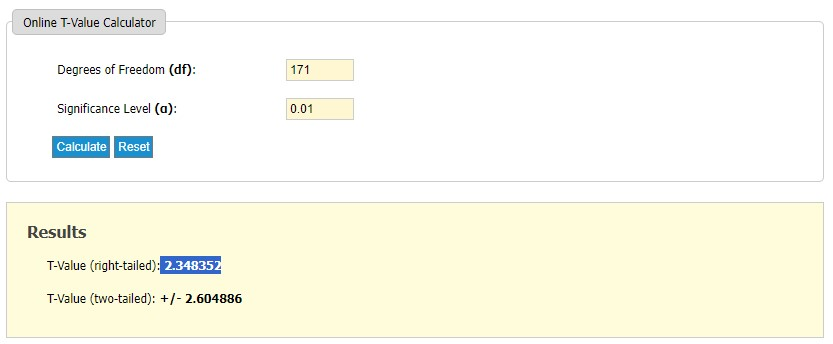

And set the calculator as follows:

Degrees of freedom = `λ’s dimensions` are (n x 1). In this dataset it will be (171 x 1). The `λ` vector is available in *`poisson_training_results.mu`*

Significance Level `(α)`: = `0.01` (99% confidence level)

The calculated T- Value is T-Value (right-tailed):  `2.348352`

This is less than the t-statistic of α which was `5.401187`. We conclude that,

`α= 0.0389` (BB_LAMBDA) is **statistically significant**.



## Stage 3: Train the NB2 model
Supply the value of `α` (alpha) found in Stage:2 into the statsmodels.genmod.families.family.NegativeBinomial class, and train the NB2 model on the training data set.  

The code is shown below:  

<span style="color:green">*nb2_training_results = sm.GLM(y_train, X_train,family=sm.families.NegativeBinomial(alpha=aux_olsr_results.params[0])).fit()*<span 


In [334]:
nb2_training_results = sm.GLM(y1_train, x1_train,family=sm.families.NegativeBinomial(alpha=aux_olsr_results.params[0])).fit()

In [335]:
print(nb2_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               BB_COUNT   No. Observations:                  163
Model:                            GLM   Df Residuals:                      156
Model Family:        NegativeBinomial   Df Model:                            6
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1319.9
Date:                Wed, 15 Jan 2025   Deviance:                       327.49
Time:                        10:18:09   Pearson chi2:                     285.
No. Iterations:                     8   Pseudo R-squ. (CS):             0.9267
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.9441      0.118     59.013      

## Stage 4: Predictions using the trained NB2 model.

In [336]:
nb2_predictions = nb2_training_results.get_prediction(x1_test)

In [337]:
predictions_summary_frame = nb2_predictions.summary_frame()
predictions_summary_frame.head()

,mean,mean_se,mean_ci_lower,mean_ci_upper
5,1232.242789,58.069444,1123.526733,1351.478559
8,2840.770432,149.866486,2561.713221,3150.226412
13,2660.090849,95.417005,2479.499443,2853.835417
14,2457.628678,86.035001,2294.658064,2632.173749
15,3592.603468,185.493294,3246.833727,3975.195763


Visualise the predicted  versus the actual  for the test data

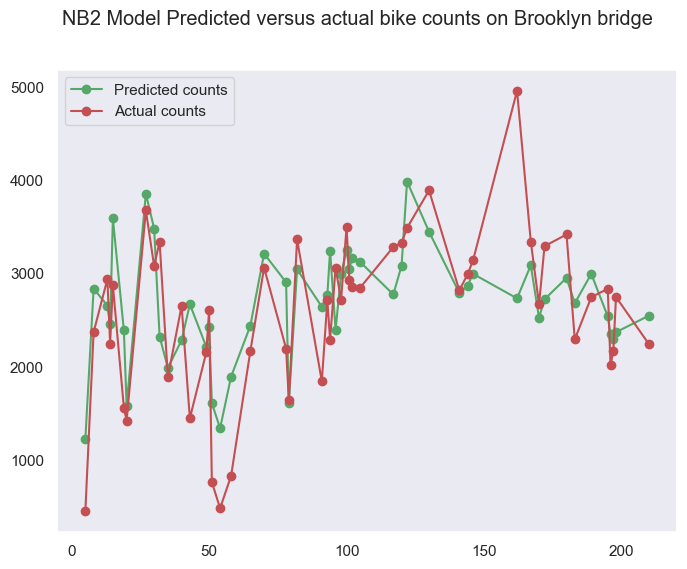

In [339]:
predicted_counts=predictions_summary_frame['mean']
actual_counts = y1_test['BB_COUNT']
fig = plt.figure()
fig.suptitle('NB2 Model Predicted versus actual bike counts on Brooklyn bridge')
predicted, = plt.plot(x1_test.index, predicted_counts, 'go-', label='Predicted counts')
actual, = plt.plot(x1_test.index, actual_counts, 'ro-', label='Actual counts')
plt.legend(handles=[predicted, actual])
plt.grid(False)
plt.show()

### Stage 4.1 Comparing Poisson Regression vs NB2 Regression outputs

